In [ ]:
import torch
import fastai
from fastai.vision.all import *
from ipywidgets import widgets
import numpy as np

In [ ]:
print(torch.__version__)
print(fastai.__version__)
print(torch.cuda.is_available())

2.3.1+cu121
2.7.16
True


In [ ]:
!git clone "https://github.com/amirbek-akramov/PredictingThePresenceOfPneumonia"

Cloning into 'PredictingThePresenceOfPneumonia'...
remote: Enumerating objects: 5819, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5819 (delta 0), reused 4 (delta 0), pack-reused 5815 (from 1)
Receiving objects: 100% (5819/5819), 1.13 GiB | 13.97 MiB/s, done.
Updating files: 100% (5843/5843), done.


In [ ]:
path = Path('./PredictingThePresenceOfPneumonia/train')
Image.open(path/'NORMAL'/"IM-0115-0001.jpeg")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
fls = get_image_files(path)
failed = verify_images(path)
print(f"{failed=}")
print(f"{fls=}")

'PosixPath' object is not iterable
failed=[]
fls=[Path('PredictingThePresenceOfPneumonia/train/NORMAL/IM-0206-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-0727-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-1206-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/IM-0185-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-1316-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-0537-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-0998-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/IM-0305-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-0957-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/NORMAL2-IM-1250-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/IM-0713-0001.jpeg'), Path('PredictingThePresenceOfPneumonia/train/NORMAL/IM-0586-0001.jpeg'), Path('PredictingTh

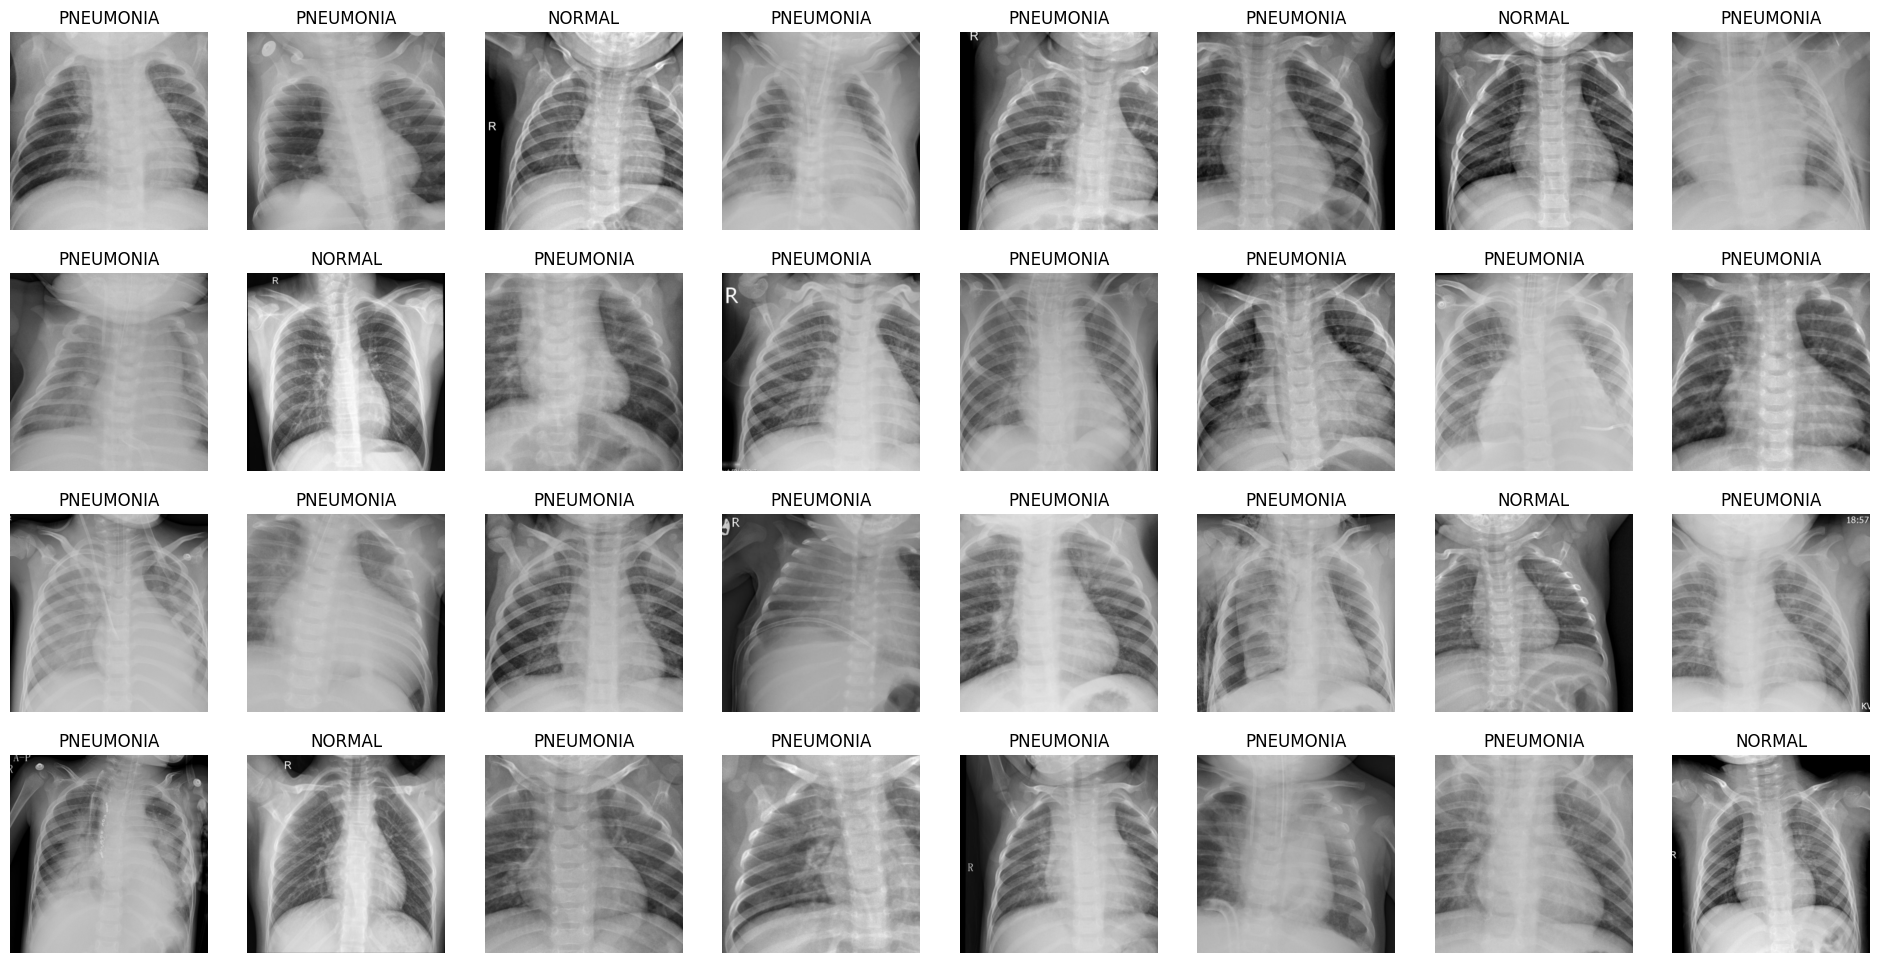

In [ ]:
pneumonia = DataBlock(
    blocks = [ImageBlock, CategoryBlock],
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=0),
    get_y = parent_label,
    item_tfms=Resize(360)
)

dls = pneumonia.dataloaders(path)
dls.train.show_batch(max_n=32, nrows=4)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.441806,0.245519,0.918504,02:13


epoch,train_loss,valid_loss,accuracy,time
0,0.172251,0.114111,0.973154,02:26
1,0.109685,0.087237,0.976031,02:28


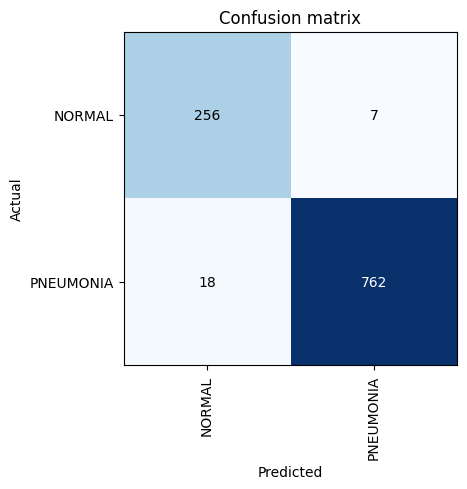

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

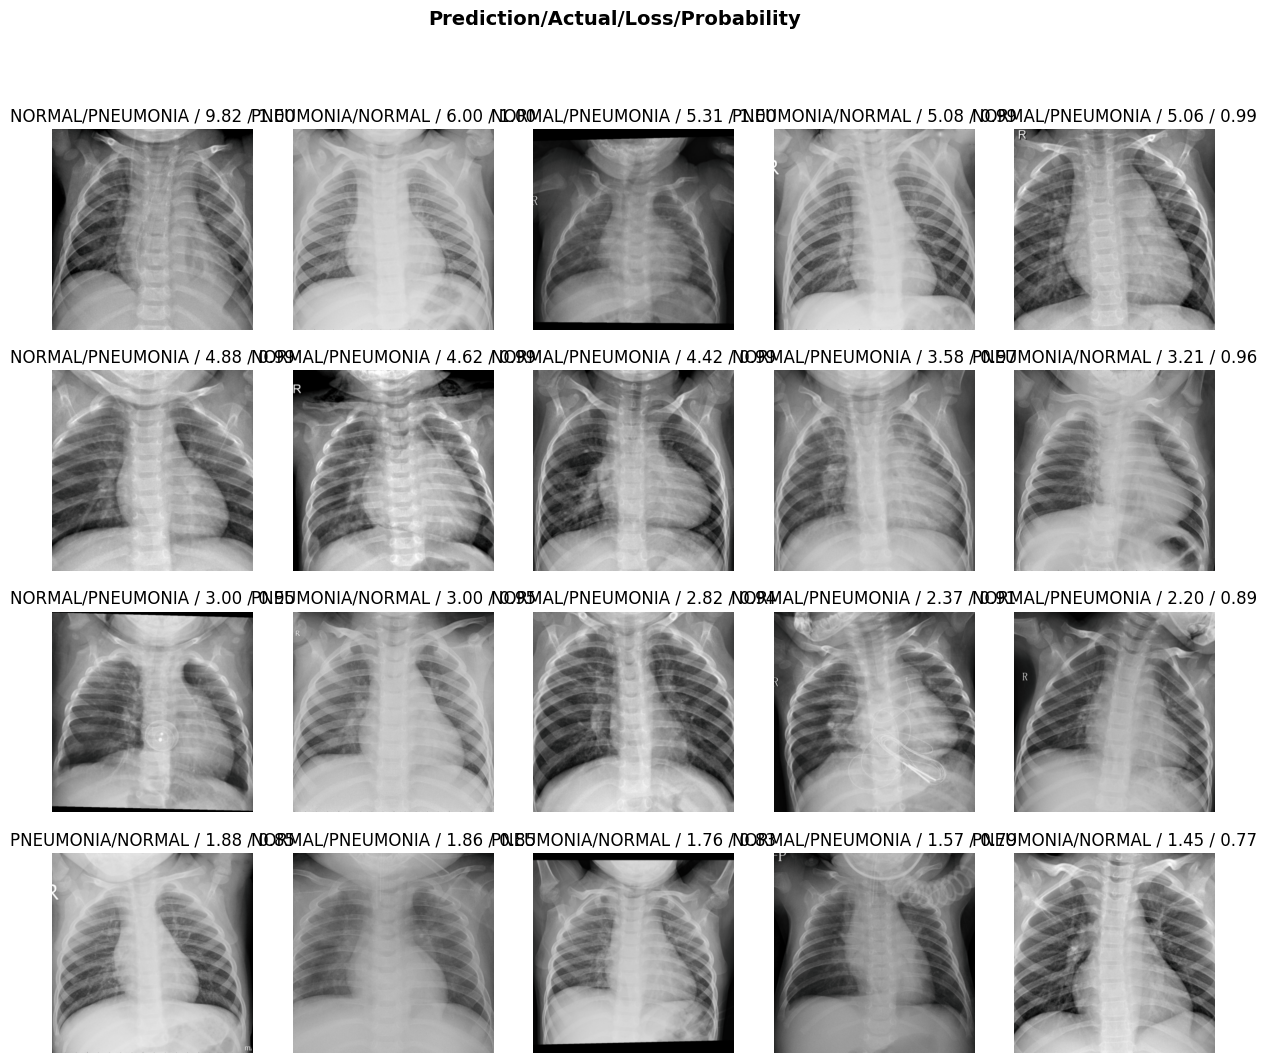

In [ ]:
interp.plot_top_losses(20, nrows=4)